In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "India Agriculture Crop Production.csv"
df = pd.read_csv(file_path)

# Step 3: Check basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# Step 4: View first 5 rows
df.head()


Shape of dataset: (345407, 10)

Column names:
['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units', 'Production', 'Production Units', 'Yield']


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
# Check what the actual column names are
df.columns.tolist()


['season', 'crop', 'area', 'production']

Top 10 Crops by Total Production:
crop
Coconut         3.108048e+11
Sugarcane       7.239868e+09
Rice            2.236428e+09
Wheat           2.007360e+09
Potato          6.323157e+08
Cotton(lint)    4.839080e+08
Maize           4.439912e+08
Jute            2.304238e+08
Banana          2.271978e+08
Soyabean        2.117965e+08
Name: production, dtype: float64


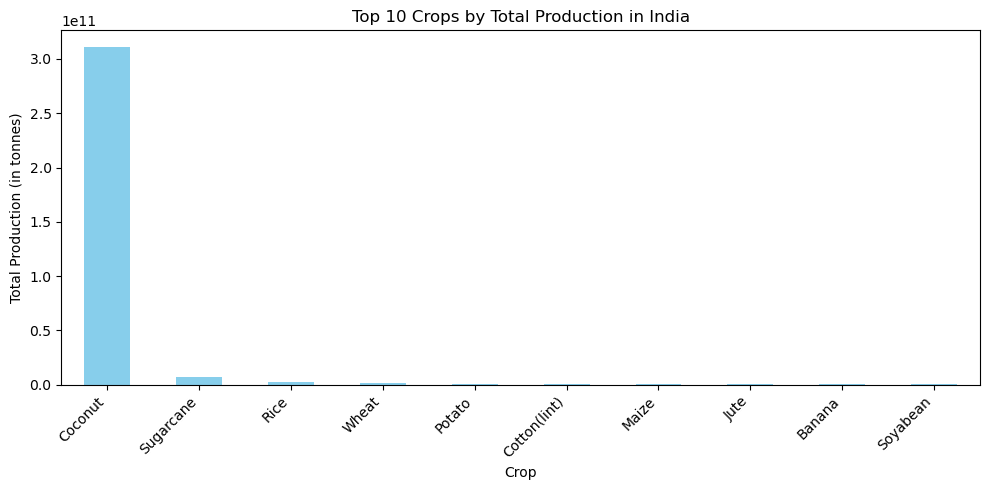

In [5]:
# Top 10 crops by total production
top_crops = df.groupby('crop')['production'].sum().sort_values(ascending=False).head(10)
print("Top 10 Crops by Total Production:")
print(top_crops)

# Plot bar chart
plt.figure(figsize=(10,5))
top_crops.plot(kind='bar', color='skyblue')
plt.title("Top 10 Crops by Total Production in India")
plt.xlabel("Crop")
plt.ylabel("Total Production (in tonnes)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
# Clean the data (safe version, no warnings)
df = df.dropna(subset=['crop', 'production']).copy()

df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['production'] = pd.to_numeric(df['production'], errors='coerce')

print("Rows:", len(df))
print("\nSample data:")
df.head()


Rows: 340414

Sample data:


,season,crop,area,production,yield_per_area
0,Kharif,Arecanut,1254.0,2061.0,1.643541
1,Whole Year,Arecanut,1258.0,2083.0,1.655803
2,Whole Year,Arecanut,1261.0,1525.0,1.209358
3,Kharif,Arecanut,3100.0,5239.0,1.690000
4,Whole Year,Arecanut,3105.0,5267.0,1.696296


Total Production by Season:
season
Whole Year    3.165540e+11
Kharif        5.622340e+09
Rabi          3.150456e+09
Winter        5.877503e+08
Summer        2.437659e+08
Autumn        8.464143e+07
Name: production, dtype: float64


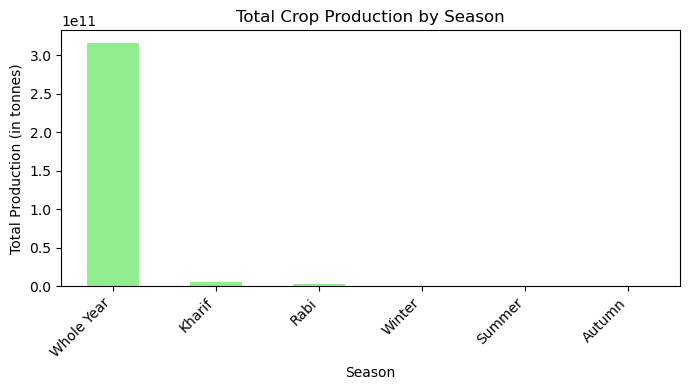

In [6]:
# Total production grouped by season
season_prod = df.groupby('season')['production'].sum().sort_values(ascending=False)
print("Total Production by Season:")
print(season_prod)

# Plot it
plt.figure(figsize=(7,4))
season_prod.plot(kind='bar', color='lightgreen')
plt.title("Total Crop Production by Season")
plt.xlabel("Season")
plt.ylabel("Total Production (in tonnes)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


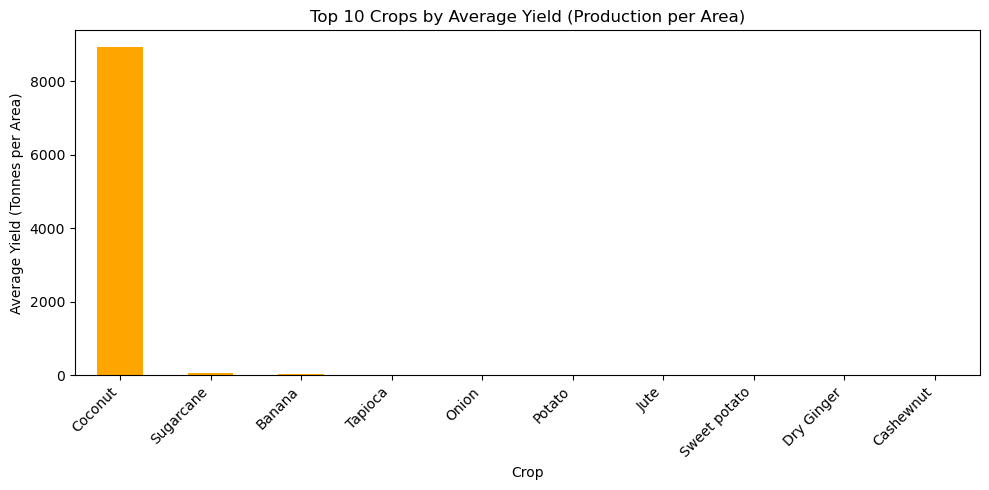

In [11]:
# Calculate yield = production per area for each crop (clean method)
df = df.copy()
df.loc[:, 'yield_per_area'] = df['production'] / df['area']

# Find top 10 high-yield crops
top_yield = df.groupby('crop')['yield_per_area'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_yield.plot(kind='bar', color='orange')
plt.title("Top 10 Crops by Average Yield (Production per Area)")
plt.xlabel("Crop")
plt.ylabel("Average Yield (Tonnes per Area)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
